<a href="https://colab.research.google.com/github/oransom48/MiniAIDoctor_AIB2023/blob/main/MiniAIDoctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Kaggle and Libraries

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !rm -r ~/.kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download data and Explore data

https://www.kaggle.com/datasets/niyarrbarman/symptom2disease

The dataset comprises 24 different diseases, and each disease has 50 symptom descriptions, resulting in a total of 1200 datapoints.

In [ ]:
! kaggle datasets download NiyarRBarman/Symptom2Disease

  0% 0.00/43.6k [00:00<?, ?B/s]
100% 43.6k/43.6k [00:00<00:00, 1.01MB/s]


In [ ]:
! unzip Symptom2Disease.zip
!rm Symptom2Disease.zip

Archive:  Symptom2Disease.zip
  inflating: Symptom2Disease.csv     


In [ ]:
fileLoc = '/content/Symptom2Disease.csv' #@param {type:"string"}
df = pd.read_csv(fileLoc) 
df = df[['label', 'text']]
df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
df.tail()

,label,text
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."
1199,diabetes,I constantly sneeze and have a dry cough. My i...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df["label"].nunique()

24

In [ ]:
df["label"].value_counts()

Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: label, dtype: int64

# Preprocess data

https://www.kaggle.com/code/dhgupta/bag-of-words-model

In [ ]:
n = 0
# txtList = df['text'][50*n : 50*n+50]
txtList = df['text'].values.tolist()[50*n : 50*n+50]
# txtList

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer(language="english") #cut suffix
lemmatizer = WordNetLemmatizer()

def preprocess(txt):
    txt = txt.lower() 
    words = word_tokenize(txt)
    words = [word for word in words if word not in stopwords.words("english")]
    words = [stemmer.stem(word) for word in words if word not in stopwords.words("english")]
    # words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words("english")]
    txt = " ".join(words)
    return txt

In [ ]:
print(lemmatizer.lemmatize('scratched'))

scratched


In [ ]:
print(stemmer.stem('scratched'))

scratch


Tokenization คือ กระบวนการตัดคำออกจากข้อความยาว ๆ ซึ่งแต่ละคำที่ถูกตัดออกมาจะถูกเรียกว่า Token

In [ ]:
txtList = [preprocess(i) for i in txtList]
print(txtList)
# print(len(txtList))

['experienc skin rash arm , leg , torso past week . red , itchi , cover dri , scali patch .', 'skin peel , especi knee , elbow , scalp . peel often accompani burn sting sensat .', 'experienc joint pain finger , wrist , knee . pain often achi throb , get wors move joint .', 'silver like dust skin , especi lower back scalp . dust made small scale flake easili scratch .', 'nail small dent pit , often feel inflammatori tender touch . even minor rash arm .', 'skin palm sole thicken deep crack . crack pain bleed easili .', 'skin around mouth , nose , eye red inflam . often itchi uncomfort . notic inflamm nail .', 'skin sensit react easili chang temperatur humid . often care product use skin .', 'notic sudden peel skin differ part bodi , main arm , leg back . also , face sever joint pain skin rash .', 'skin genit red inflam . often itchi , burn , uncomfort . rash differ part bodi .', "experienc fatigu general feel malais . often feel tire lack energi , even good night 's sleep .", 'rash skin 

#Bag-of-words 

## CountVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cVect = CountVectorizer() # create the transform
cVector = cVect.fit_transform(txtList) 
print(sorted(cVect.vocabulary_)) # summarize

['abdomen', 'accompani', 'ach', 'achi', 'addit', 'afraid', 'agoni', 'air', 'alarm', 'also', 'anyth', 'area', 'arm', 'around', 'asleep', 'back', 'becom', 'begin', 'belli', 'bleed', 'bodi', 'break', 'burn', 'care', 'caus', 'chang', 'chest', 'coat', 'compos', 'concern', 'constant', 'cover', 'crack', 'deep', 'dent', 'develop', 'differ', 'difficulti', 'discomfort', 'dri', 'due', 'dust', 'easili', 'elbow', 'energi', 'especi', 'even', 'everyday', 'excruci', 'experienc', 'extend', 'extrem', 'eye', 'face', 'fall', 'fatigu', 'feel', 'film', 'find', 'finger', 'fissur', 'flake', 'flaki', 'fractur', 'frequent', 'general', 'genit', 'get', 'go', 'good', 'got', 'grown', 'heal', 'humid', 'humidifi', 'hurt', 'hydrat', 'idea', 'includ', 'infect', 'inflam', 'inflamm', 'inflammatori', 'irrit', 'itch', 'itchi', 'joint', 'keep', 'knee', 'know', 'lack', 'layer', 'leg', 'less', 'life', 'lik', 'like', 'littl', 'lower', 'made', 'main', 'make', 'malais', 'minor', 'miser', 'moistur', 'month', 'moreov', 'most', 'mo

In [ ]:
cVector.shape

(50, 193)

In [ ]:
cvTable = pd.DataFrame(cVector.toarray(), columns = cVect.get_feature_names_out())
cvTable.head()

,abdomen,accompani,ach,achi,addit,afraid,agoni,air,alarm,also,...,ve,week,weird,winter,worri,wors,worsen,worst,wrist,wrong
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TfidfVectorizer

TF (Term Frequency): This summarizes how often a given word appears within a document.

IDF (Inverse Document Frequency): This downscales words that appear a lot across documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=15, sublinear_tf=True)
tfidfVector = tfidf.fit_transform(txtList)
print(sorted(tfidf.vocabulary_))

['joint', 'nail', 'pain', 'peel', 'rash', 'skin']


In [ ]:
tfidfVector

<50x6 sparse matrix of type '<class 'numpy.float64'>'
	with 132 stored elements in Compressed Sparse Row format>

In [ ]:
# summarize encoded vector
tfidfVector.shape

(50, 6)

In [ ]:
print(tfidf.idf_) 

[2.09861229 2.09861229 1.93609336 1.98738665 1.7537718  1.21825357]


In [ ]:
tfidfTable = pd.DataFrame(tfidfVector.toarray(), columns = tfidf.get_feature_names_out())
tfidfTable.head()

,joint,nail,pain,peel,rash,skin
0,0.000000,0.000000,0.000000,0.000000,0.821292,0.570508
1,0.000000,0.000000,0.000000,0.940274,0.000000,0.340420
2,0.734993,0.000000,0.678074,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.767334,0.000000,0.000000,0.641247,0.000000




---



In [ ]:
txtList[50*n]

'experienc skin rash arm , leg , torso past week . red , itchi , cover dri , scali patch .'

In [ ]:
# txtList[50*n].split(' ')[:10]
txtList[50*n].split(' ')

['experienc',
 'skin',
 'rash',
 'arm',
 ',',
 'leg',
 ',',
 'torso',
 'past',
 'week',
 '.',
 'red',
 ',',
 'itchi',
 ',',
 'cover',
 'dri',
 ',',
 'scali',
 'patch',
 '.']

In [ ]:
# [np.where(tfidf.get_feature_names_out() == x) for x in txt[50*n].split(' ')[:8]]
[np.where(tfidf.get_feature_names_out() == x) for x in txtList[50*n].split(' ')]

[(array([], dtype=int64),),
 (array([5]),),
 (array([4]),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),)]

# Explore data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

keyword = pd.DataFrame({'label':[], 'word':[]})

for i in train_df['label'].unique():
    if (i == 'drug reaction'):
        continue
    x = []
    tlist = train_df[train_df['label'] == i]
    tlist = tlist['text'].values.tolist()
    tlist = [preprocess(j) for j in tlist]

    tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=15, sublinear_tf=True)
    tfidfVector = tfidf.fit_transform(tlist)
    x = sorted(tfidf.vocabulary_)
    df2 = pd.DataFrame({'label': [i], 'word': [x]})
    keyword = pd.concat([keyword, df2], ignore_index = True)

In [ ]:
keyword

,label,word
0,Dengue,"[experienc, feel, fever, pain, vomit]"
1,Common Cold,"[ca, chest, cough, feel, hurt, lot, nose, real..."
2,Chicken pox,"[feel, fever, red, spot]"
3,diabetes,[feel]
4,Fungal infection,"[also, bodi, bump, differ, itch, littl, lump, ..."
5,Typhoid,"[constip, feel, fever, pain, realli, vomit]"
6,Acne,"[also, blackhead, fil, lot, pimpl, pus, rash, ..."
7,Arthritis,"[also, difficult, feel, joint, move, muscl, ne..."
8,peptic ulcer disease,"[feel, get]"
9,Impetigo,"[face, high, near, nose, pain, rash, red, sore]"


In [ ]:
keyword.to_csv('disease_words.csv')

#### wordcloud

In [ ]:
from wordcloud import WordCloud

x = []
tlist = train_df[train_df['label'] == 'gastroesophageal reflux disease']
tlist = tlist['text'].values.tolist()
tlist = [preprocess(j) for j in tlist]

tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=15, sublinear_tf=True)
tfidfVector = tfidf.fit_transform(tlist)

tfidf_weights = [(word, tfidfVector.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

In [ ]:
tfidf_weights[0:10]

[('throat', 15.109130615063236),
 ('feel', 10.46231850307765),
 ('eat', 10.548473727461952),
 ('frequent', 11.193559580154899),
 ('heartburn', 8.810647594829687),
 ('get', 12.064057997963157)]

In [ ]:
w = WordCloud(width=240, 
              height=240, 
              mode='RGBA', 
              background_color='white').fit_words(dict(tfidf_weights))

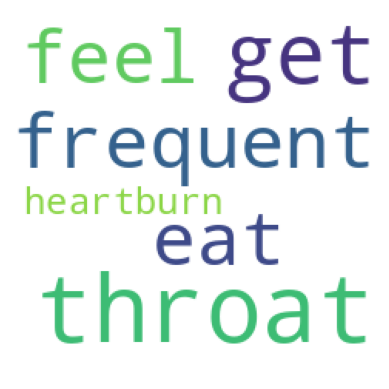

In [ ]:
plt.imshow(w)
plt.axis('off')
plt.savefig('gastroesophageal reflux disease_wordcloud.png')

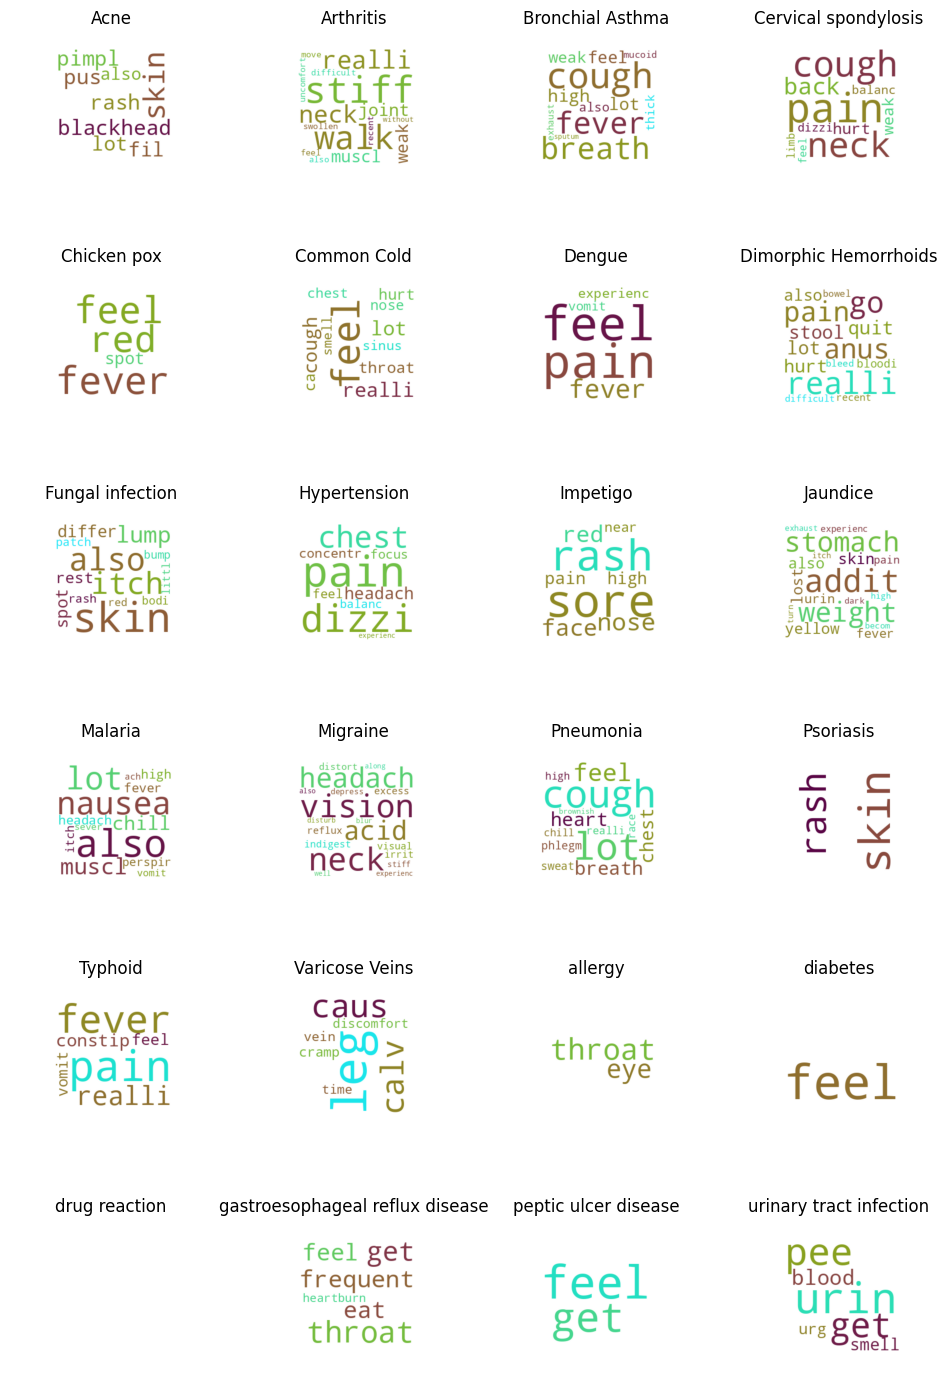

In [ ]:
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(12,18))
  
# setting values to rows and column variables
rows = 6
columns = 4

#name pic
piclist = ["Acne_wordcloud.png",
           "Arthritis_wordcloud.png",
           "Bronchial Asthma_wordcloud.png",
           "Cervical spondylosis_wordcloud.png",
           "Chicken pox_wordcloud.png",
           "Common Cold_wordcloud.png",
           "Dengue_wordcloud.png",
           "Dimorphic Hemorrhoids_wordcloud.png",
           "Fungal infection_wordcloud.png",
           "Hypertension_wordcloud.png",
           "Impetigo_wordcloud.png",
           "Jaundice_wordcloud.png",
           "Malaria_wordcloud.png",
           "Migraine_wordcloud.png",
           "Pneumonia_wordcloud.png",
           "Psoriasis_wordcloud.png",
           "Typhoid_wordcloud.png",
           "Varicose Veins_wordcloud.png",
           "allergy_wordcloud.png",
           "diabetes_wordcloud.png",
           "drug reaction_wordcloud.png",
           "gastroesophageal reflux disease_wordcloud.png",
           "peptic ulcer disease_wordcloud.png",
           "urinary tract infection_wordcloud.png",] 
  
for i in range(24):
    Image = cv2.imread(piclist[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(Image)
    plt.axis('off')
    picname = piclist[i].replace("_wordcloud.png","")
    plt.title(picname)

plt.savefig('alldisease.png')

# Train

In [ ]:
ppdf=df

In [ ]:
df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
ppdf['text'] = ppdf['text'].apply(preprocess)

In [ ]:
ppdf.tail()

,label,text
1195,diabetes,"'m shake trembl . ve lost sens tast smell , 'm..."
1196,diabetes,"particular crevic skin , skin rash irrit . ski..."
1197,diabetes,regular experi intens urg want urin . frequent...
1198,diabetes,"troubl breath , especi outsid . start feel hot..."
1199,diabetes,constant sneez dri cough . infect n't seem hea...


## TfidfVectorizer + Logistic Regression

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(ppdf, test_size=0.2, random_state=375, stratify=df['label'].values)

In [ ]:
train_df

,label,text
263,Dengue,joint pain experienc sever feel like constant ...
373,Common Cold,eye constant red runni . persist tight sinus a...
395,Common Cold,"lack energi feel like neck bloat . eye red , t..."
193,Chicken pox,small red spot bodi . spot itchi uncomfort . a...
158,Chicken pox,'m worri rash skin . 's spread rapid caus lot ...
...,...,...
415,Pneumonia,"ve feel realli sick high fever , short breath ..."
260,Dengue,experienc back pain wors sit stand long time ....
609,Bronchial Asthma,"hey mom , hey dad , ve feel realli exhaust lat..."
84,Varicose Veins,"cramp calv becom frequent intens , make diffic..."


In [ ]:
y_train = train_df['label']
y_test = test_df['label']

### TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=15, sublinear_tf=True)
tfidf_fit = tfidf.fit(train_df['text'])

text_train = tfidf.transform(train_df['text'])
text_test = tfidf.transform(test_df['text'])

text_train.shape, text_test.shape

((960, 233), (240, 233))

In [ ]:
display(text_train)

<960x233 sparse matrix of type '<class 'numpy.float64'>'
	with 11599 stored elements in Compressed Sparse Row format>

In [ ]:
print(sorted(tfidf.vocabulary_))

['abdomin', 'accompani', 'ach', 'acid', 'addit', 'along', 'also', 'alway', 'anus', 'anyth', 'appear', 'appetit', 'area', 'arm', 'around', 'away', 'back', 'bad', 'balanc', 'bathroom', 'becom', 'belli', 'black', 'blackhead', 'bleed', 'bloat', 'blood', 'bloodi', 'blur', 'bodi', 'bother', 'bowel', 'breath', 'brownish', 'bump', 'burn', 'ca', 'calv', 'caus', 'challeng', 'chang', 'chest', 'chill', 'color', 'come', 'concentr', 'concern', 'constant', 'constip', 'cough', 'cover', 'cramp', 'dark', 'day', 'deal', 'depress', 'develop', 'differ', 'difficult', 'difficulti', 'discomfort', 'distort', 'disturb', 'dizzi', 'dri', 'due', 'eat', 'especi', 'even', 'everi', 'excess', 'excruci', 'exhaust', 'experi', 'experienc', 'extrem', 'eye', 'face', 'fatigu', 'feel', 'feet', 'fever', 'fil', 'find', 'focus', 'food', 'frequent', 'general', 'get', 'go', 'hard', 'head', 'headach', 'heal', 'health', 'heart', 'heartburn', 'high', 'hue', 'hunger', 'hurt', 'ill', 'includ', 'increas', 'indigest', 'infect', 'inflam'

In [ ]:
print(len(tfidf.vocabulary_))

233


In [ ]:
X_train = text_train.toarray()
X_test = text_test.toarray()
X_train.shape, X_test.shape

((960, 233), (240, 233))

### Logistic Regression

In [ ]:
model1 = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
model1.fit(X_train,y_train)

LogisticRegression(C=2.0, multi_class='ovr', solver='liblinear')

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores1 = cross_val_score(model1, X_train, y_train, cv=5)
cv_scores1

array([0.92708333, 0.91145833, 0.93229167, 0.9375    , 0.93229167])

### evaluation

In [ ]:
model1.score(X_test,y_test)

0.975

In [ ]:
print("CV average score: %.4f" % cv_scores1.mean())

CV average score: 0.9281


In [ ]:
from sklearn.metrics import classification_report
y_val_pred = model1.predict(X_test)
print(classification_report(y_test, y_val_pred))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       1.00      0.90      0.95        10
                    Common Cold       0.91      1.00      0.95        10
                         Dengue       0.91      1.00      0.95        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        10
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
                        Malaria       1.00      1.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_val_pred)

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.90909091, 0.90909091, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.875     ,
        0.9       , 1.        , 1.        , 0.83333333]),
 array([1. , 1. , 1. , 1. , 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 0.9, 0.7, 0.9, 1. , 1. , 1. ]),
 array([1.        , 1.        , 1.        , 1.        , 0.94736842,
        0.95238095, 0.95238095, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.94736842, 0.77777778,
        0.9       , 1.        , 1.        , 0.90909091]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10]))

## TfidfVectorizer + LinearSVC

### LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model4 = LinearSVC(C=2., penalty='l2', multi_class='ovr')
model4.fit(X_train, y_train)

LinearSVC(C=2.0)

In [ ]:
# from sklearn.model_selection import cross_val_score

# cv_scores4 = cross_val_score(model4, X_train, y_train, cv=5)
# cv_scores4

### evaluation

In [ ]:
model4.score(X_test, y_test)

0.9791666666666666

In [ ]:
# print("CV average score: %.4f" % cv_scores4.mean())

In [ ]:
y_val_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_val_pred4))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       1.00      0.90      0.95        10
                    Common Cold       1.00      1.00      1.00        10
                         Dengue       1.00      0.90      0.95        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       0.91      1.00      0.95        10
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
                        Malaria       1.00      1.

## USE + Logistic Regression

In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.1 MB/s eta 0:00:00


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text 

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=375, stratify=df['label'].values)

In [ ]:
test_df[test_df['label'] == 'Impetigo']

,label,text
232,Impetigo,I've acquired skin rashes with blistering sore...
202,Impetigo,I have a high fever. There are red sores devel...
227,Impetigo,I have a high fever and am really weak. My fac...
224,Impetigo,I have rashes on my face. I am starting to hav...
243,Impetigo,I feel I have a skin condition. My face has ra...
216,Impetigo,I have a high fever every night and developed ...
222,Impetigo,I have been developing sores on my face and no...
240,Impetigo,My face is covered in sores. Most of them are ...
207,Impetigo,I am suffering from extreme fever and weakness...
223,Impetigo,The rash on my face has become more painful an...


In [ ]:
train_df['text'][0]

'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

### USE

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
#embed('I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.')

In [ ]:
train_embed = embed(train_df['text'])
test_embed = embed(test_df['text'])

In [ ]:
display(train_embed)

<tf.Tensor: shape=(960, 512), dtype=float32, numpy=
array([[ 0.0154848 , -0.0463181 ,  0.00966138, ...,  0.00368892,
        -0.00736834,  0.02607089],
       [-0.04588193, -0.00650541,  0.0374097 , ...,  0.04774683,
        -0.03001489,  0.01222089],
       [-0.03457027,  0.0162576 ,  0.02078296, ..., -0.01090193,
        -0.00366265,  0.01495519],
       ...,
       [-0.0505915 ,  0.00809468, -0.03714899, ...,  0.01136035,
         0.0057138 , -0.02280407],
       [ 0.04717746, -0.03112984,  0.07126301, ...,  0.04816014,
        -0.04132693,  0.06415036],
       [ 0.00739421, -0.00474234, -0.04405625, ...,  0.02877026,
        -0.01325532,  0.02942256]], dtype=float32)>

### Logistic Regression

In [ ]:
model2 = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='auto')
model2.fit(train_embed,y_train)
model2.score(test_embed,y_test)

0.9583333333333334

### evaluation

In [ ]:
y_pred_test2 = model2.predict(test_embed)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test2)))

Model accuracy score: 0.9583


In [ ]:
from sklearn.metrics import classification_report
# y_val_pred2 = model2.predict(test_embed)
print(classification_report(y_test, y_pred_test2))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       0.91      1.00      0.95        10
                    Common Cold       1.00      0.90      0.95        10
                         Dengue       1.00      1.00      1.00        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        10
                   Hypertension       0.91      1.00      0.95        10
                       Impetigo       0.91      1.00      0.95        10
                       Jaundice       1.00      1.00      1.00        10
                        Malaria       1.00      1.

## USE + LinearSVC

### LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
# model3 = SVC(C=2., kernel = "linear")
model3 = LinearSVC(C=2., penalty='l2', multi_class='ovr')
model3.fit(train_embed,y_train)
model3.score(test_embed,y_test)

0.9833333333333333

### evaluation

In [ ]:
y_pred_test3 = model3.predict(test_embed)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test3)))

Model accuracy score: 0.9833


In [ ]:
from sklearn.metrics import precision_score
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, y_pred_test3, average='macro')))

Model precision score: 0.9848


In [ ]:
from sklearn.metrics import recall_score
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, y_pred_test3, average='macro')))

Model recall score: 0.9833


In [ ]:
# y_val_pred2 = model2.predict(test_embed)
print(classification_report(y_test, y_pred_test3))

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       1.00      1.00      1.00        10
                    Common Cold       1.00      0.90      0.95        10
                         Dengue       1.00      1.00      1.00        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        10
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       0.91      1.00      0.95        10
                       Jaundice       1.00      1.00      1.00        10
                        Malaria       1.00      1.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, y_pred_test3, labels=df['label'].values)
cm = confusion_matrix(y_test, y_pred_test3)

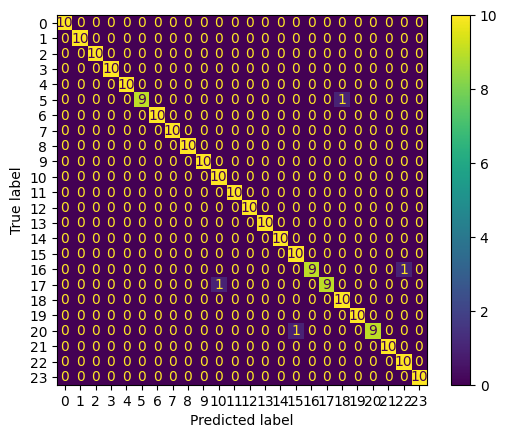

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### predict 

In [ ]:
test_df[test_df['label'] == 'drug reaction']

,label,text
1075,drug reaction,My rashes occasionally cause my skin to peel o...
1083,drug reaction,"Along with a change in taste and smell, my ton..."
1056,drug reaction,I have hair loss and there is a significant ch...
1058,drug reaction,I am experiencing changes in my menstrual cycl...
1092,drug reaction,I've gained a lot of weight and am currently q...
1099,drug reaction,"My entire body itches, and I have rashes on my..."
1091,drug reaction,"My monthly cycle has changed, and I've had an ..."
1093,drug reaction,I have awful mental clarity and have trouble f...
1066,drug reaction,I have rashes in my chest and back and itch al...
1050,drug reaction,"I have a metallic taste in my mouth, and also ..."


In [ ]:
inp = test_df[test_df['label'] == 'drug reaction']['text']
ask_embed = embed(inp)
model3.predict(ask_embed)

array(['drug reaction', 'drug reaction', 'drug reaction', 'drug reaction',
       'drug reaction', 'drug reaction', 'drug reaction', 'drug reaction',
       'drug reaction', 'Psoriasis'], dtype=object)

In [ ]:
import joblib
filename = "LinearSVC1_model.joblib"
# save model
joblib.dump(model3, filename)

['LinearSVC1_model.joblib']

## USE + Logistic Regression + K-foldCV

In [ ]:
# from sklearn.model_selection import cross_val_score
# modelclf = SVC(C=2., kernel = "linear")
# scores = cross_val_score(modelclf, embed(ppdf['text']), ppdf['label'])
# scores

## Pretrained BERT

In [ ]:
import seaborn as sea
import os
from tqdm.notebook import tqdm
import re
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

plt.style.use('ggplot')
np.__version__

'1.22.4'

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.8 MB/s eta 0:00:00


In [ ]:
int2label = {}

for i, disease in enumerate(df['label'].unique()):
    int2label[i] = disease

label2int = {v : k for k, v in int2label.items()}
num_classes = len(int2label)

int2label, label2int

({0: 'Psoriasis',
  1: 'Varicose Veins',
  2: 'Typhoid',
  3: 'Chicken pox',
  4: 'Impetigo',
  5: 'Dengue',
  6: 'Fungal infection',
  7: 'Common Cold',
  8: 'Pneumonia',
  9: 'Dimorphic Hemorrhoids',
  10: 'Arthritis',
  11: 'Acne',
  12: 'Bronchial Asthma',
  13: 'Hypertension',
  14: 'Migraine',
  15: 'Cervical spondylosis',
  16: 'Jaundice',
  17: 'Malaria',
  18: 'urinary tract infection',
  19: 'allergy',
  20: 'gastroesophageal reflux disease',
  21: 'drug reaction',
  22: 'peptic ulcer disease',
  23: 'diabetes'},
 {'Psoriasis': 0,
  'Varicose Veins': 1,
  'Typhoid': 2,
  'Chicken pox': 3,
  'Impetigo': 4,
  'Dengue': 5,
  'Fungal infection': 6,
  'Common Cold': 7,
  'Pneumonia': 8,
  'Dimorphic Hemorrhoids': 9,
  'Arthritis': 10,
  'Acne': 11,
  'Bronchial Asthma': 12,
  'Hypertension': 13,
  'Migraine': 14,
  'Cervical spondylosis': 15,
  'Jaundice': 16,
  'Malaria': 17,
  'urinary tract infection': 18,
  'allergy': 19,
  'gastroesophageal reflux disease': 20,
  'drug reacti

In [ ]:
df['label'] = df['label'].map(lambda x : label2int[x])

In [ ]:
X, y = df['text'].values, df['label'].values

x_tokenizer = Tokenizer(filters = '')
x_tokenizer.fit_on_texts(X)
x_vocab = len(x_tokenizer.word_index) + 1
print("X vocab:", x_vocab)

X vocab: 2414


In [ ]:
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.2, stratify = y)
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((960,), (240,), (960,), (240,))

In [ ]:
from transformers import AutoTokenizer
BATCH_SIZE = 8

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
train_encodings = tokenizer(list(train_x), padding="max_length", truncation=True)
val_encodings = tokenizer(list(val_x), padding="max_length", truncation=True)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_y
)).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_y
)).batch(BATCH_SIZE)

In [ ]:
pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
num_classes = 24

from transformers import TFAutoModelForSequenceClassification

model5 = TFAutoModelForSequenceClassification.from_pretrained(
    "bert-base-cased", 
    num_labels = num_classes, 
    id2label = int2label, 
    label2id = label2int,
    output_attentions = True)

model5.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate = 3e-5),
    metrics = ['accuracy'])

model5

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
for layer in model5.layers:
    print(layer, layer.trainable)

<transformers.models.bert.modeling_tf_bert.TFBertMainLayer object at 0x7f2e10c048b0> True
<keras.layers.regularization.dropout.Dropout object at 0x7f2e10b86d40> True
<keras.layers.core.dense.Dense object at 0x7f2e10b87130> True


In [ ]:
EPOCHS = 3

history = model5.fit(train_dataset, 
          epochs = EPOCHS, 
          validation_data = val_dataset)

Epoch 1/3
120/120 [==============================] - 208s 1s/step - loss: 2.6958 - accuracy: 0.3240 - val_loss: 1.6644 - val_accuracy: 0.7625
Epoch 2/3
120/120 [==============================] - 123s 1s/step - loss: 1.1174 - accuracy: 0.8854 - val_loss: 0.6530 - val_accuracy: 0.9000
Epoch 3/3
120/120 [==============================] - 122s 1s/step - loss: 0.4164 - accuracy: 0.9812 - val_loss: 0.2802 - val_accuracy: 0.9625


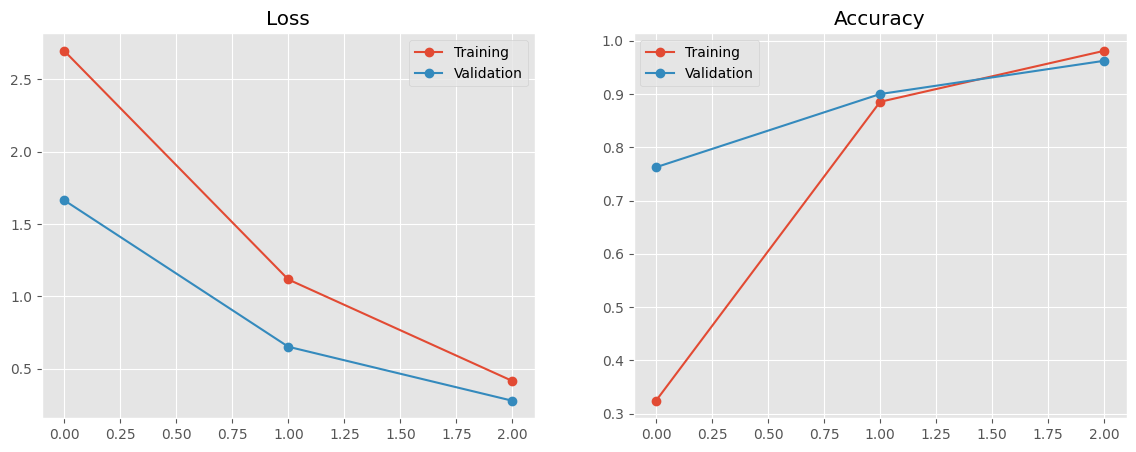

In [ ]:
plt.figure(figsize = (14, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], marker = 'o', label = 'Training')
plt.plot(history.history['val_loss'], marker='o', label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], marker = 'o', label = 'Training')
plt.plot(history.history['val_accuracy'], marker='o', label = 'Validation')
plt.legend()

In [ ]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(model=model5, tokenizer=tokenizer, top_k = num_classes)

predicted_classes = []
for i in val_x:
    val_all = pipe(i)[0]
    val_txt = max(val_all, key=lambda x:x['score'])['label']
    predicted_classes.append(label2int[val_txt])

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(val_y, predicted_classes)))

Model accuracy score: 0.9625


In [ ]:
keysList = list(label2int.keys())

In [ ]:
print(classification_report(val_y, predicted_classes, target_names= keysList))

                                 precision    recall  f1-score   support

                      Psoriasis       1.00      1.00      1.00        10
                 Varicose Veins       1.00      1.00      1.00        10
                        Typhoid       0.91      1.00      0.95        10
                    Chicken pox       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        10
                         Dengue       1.00      0.90      0.95        10
               Fungal infection       1.00      1.00      1.00        10
                    Common Cold       1.00      1.00      1.00        10
                      Pneumonia       0.91      1.00      0.95        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
                           Acne       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      0.

In [ ]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(model=model5, tokenizer=tokenizer, top_k = num_classes)
text = "I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches." #@param {type:"string"}
print("symptom: ", text, "\ndisease: ", max(pipe(text)[0], key=lambda x:x['score'])['label'])

symptom:  I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches. 
disease:  Psoriasis


# Save model

In [ ]:
! sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as d

In [ ]:
model5.push_to_hub("oransom48/pretrained_bert_fordiseaseclassif_1")

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

tf_model.h5:   0%|          | 0.00/434M [00:00<?, ?B/s]

https://huggingface.co/oransom48

# Load model

In [ ]:
!pip install -U transformers==4.15.0
!pip install -U sentence-transformers #==2.2.0
!pip install -U transformers[sentencepiece]

In [ ]:
import transformers
from transformers import pipeline

In [ ]:
classifier = pipeline("text-classification",model="oransom48/pretrained_bert_fordiseaseclassif_1")
# text = "I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
# classifier(text)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at oransom48/pretrained_bert_fordiseaseclassif_1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


OSError: ignored